# Problem Set 1
Plot the Moment-Capacity Curve and comment on As = atleast twice Asb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

def centroid_of_tbeam(bf, tf, bw, y):
    # Calculate centroid of t-beam from top of flange
    # y - height of beam
    kd_prime = 0
    if (y <= tf):
        kd_prime = y / 2
    else:
        a_total = bf * tf + bw * (y - tf)
        ay = bf * tf * tf / 2
        ay += bw * (y - tf) * ((y - tf) / 2 + tf)
        kd_prime = ay / a_total
    return kd_prime

def area_of_tbeam(bf, tf, bw, y):
    # Calculate the area of t-beam
    area = 0
    if (y <= tf):
        area = bf * y
    else:
        area = bf * tf + bw * (y - tf)
    return area

In [2]:
student_number = [3, 3, 8]
d = 435
bw = 250
tf = 125
ϵcu = 0.003
Es = 200000
fc_base = 28        # Basis for calculating β1
student_number_reversed = ['.']

# Reverse the student number then append decimal at the start
for i in range(len(student_number)):
    student_number_reversed.append(str(student_number[len(student_number) - 1 - i]))

# Converted student number
student_number_reversed = float(''.join(student_number_reversed))

# Factor for calculating flange width
α = 10 + 10 * student_number_reversed

# Calculate for b then round to the nearest 25mm
bf = bw + α * tf
bf = int(round(bf / 100 * 4) / 4 * 100)
print('bf = ', bf)
# Given arrays
fcPrime = [20, 40, 20, 40]
fy = [300, 300, 400, 400]
β1 = []

# Calculate for corresponding β1
for fcx in fcPrime:
    if fcx <= fc_base:
        β1.append(0.85)
    else:
        β1.append(round(0.85 - (0.05 / 7)*(fcx - fc_base), 3))
        
# Results array
M = ([0], [0], [0], [0])
As = ([0], [0], [0], [0])
MnMax = []
        
# -------------------------------------
# Start of problem main calculation
# -------------------------------------
for i in range(4):     # 4 cases
    print('= = = = = = = = = = = = =')
    print('Case # ', i+1)
    print('= = = = = = = = = = = = =')
    
    # Calculate balanced value for 'c'
    c_bal = 600 * d / (600 + fy[i])
    
    # Balanced equivalent compression block height
    a_bal = β1[i] * c_bal
    
    # Web component of the compression, z
    z_bal = a_bal - tf if a_bal > tf else 0
    
    # Balanced equation
    # Asb.fy = 0.85 f'c.bf.tf + 0.85f'c.bw.z
    As_bal = (0.85 * fcPrime[i] * bf * tf + 0.85 * fcPrime[i] * bw * z_bal) / fy[i]
    
    print('cb = ', c_bal, 'ab = ', a_bal, 'zb = ', z_bal, 'Asb = ', round(As_bal, 3))
    
    As_limit = 2 * As_bal
    
    As_trial = 100
    Mmax = 0.0
    while (As_trial <= As_limit):
        a = 10
        c = a / β1[i]
        As_calc = 0
        fs = 0.0
        fs_actual = 0.0
        steel_yields = False
        while (As_calc < As_trial):
            c = a / β1[i]
            fs = 600 * (d - c) / c
            fs_actual = fs
            if (fs >= fy[i]):
                fs = fy[i]
                steel_yields = True
            Ac = area_of_tbeam(bf, tf, bw, a)
            
            As_calc = 0.85 * fcPrime[i] * Ac / fs
            # Try for a
            a += 0.02
        
        # Calculate for the strain in concrete
        ϵc = (fs/Es) / (d-c) * c
        
        # Calculate moment
        Mn = As_calc * fs * (d - centroid_of_tbeam(bf, tf, bw, a))
        Mmax = Mn
        M[i].append(Mn/1000**2)
        As[i].append(As_calc)
        
        print('As = ', round(As_trial, 2),'M = ', round(Mn / 1000**2, 2), 'c = ', \
              round(c, 2), 'a = ', round(a, 2), 'fs = ', round(fs, 2), 'fs (actual) = ', fs_actual,
             'ϵc = ', ϵc)
        # Increment steel area each loop
        As_trial += 100
        
    MnMax.append(Mmax)

bf =  2550
= = = = = = = = = = = = =
Case #  1
= = = = = = = = = = = = =
cb =  290.0 ab =  246.5 zb =  121.5 Asb =  19783.75
As =  100 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  200 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  300 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  400 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  500 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  600 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  700 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  800 M =  186.4 c =  11.76 a =  10.02 fs =  300 fs (actual) =  21585.0 ϵc =  4.1695621959694237e-05
As =  900 M =  186.4 c =  11.76 a =

As =  8000 M =  977.81 c =  65.15 a =  55.4 fs =  300 fs (actual) =  3405.958829902261 ϵc =  0.00026424277125681724
As =  8100 M =  988.99 c =  65.95 a =  56.08 fs =  300 fs (actual) =  3357.3671066711904 ϵc =  0.00026806720010203014
As =  8200 M =  1000.48 c =  66.78 a =  56.78 fs =  300 fs (actual) =  3308.5623678644592 ϵc =  0.0002720214703345347
As =  8300 M =  1011.62 c =  67.58 a =  57.46 fs =  300 fs (actual) =  3262.2910863507395 ϵc =  0.00027587973487882623
As =  8400 M =  1023.07 c =  68.4 a =  58.16 fs =  300 fs (actual) =  3215.7894736839735 ϵc =  0.0002798690671031303
As =  8500 M =  1034.49 c =  69.22 a =  58.86 fs =  300 fs (actual) =  3170.394289598673 ϵc =  0.0002838763629346327
As =  8600 M =  1045.57 c =  70.02 a =  59.54 fs =  300 fs (actual) =  3127.3185483868565 ϵc =  0.0002877864809979914
As =  8700 M =  1056.95 c =  70.85 a =  60.24 fs =  300 fs (actual) =  3083.9920292259294 ϵc =  0.00029182954802444696
As =  8800 M =  1067.99 c =  71.65 a =  60.92 fs =  300 fs

As =  15600 M =  1783.15 c =  127.01 a =  107.98 fs =  300 fs (actual) =  1454.927751018976 ϵc =  0.0006185874173955883
As =  15700 M =  1793.07 c =  127.84 a =  108.68 fs =  300 fs (actual) =  1441.6896742132237 ϵc =  0.0006242674939675619
As =  15800 M =  1802.96 c =  128.66 a =  109.38 fs =  300 fs (actual) =  1428.6210680322706 ϵc =  0.0006299781097584026
As =  15900 M =  1812.55 c =  129.46 a =  110.06 fs =  300 fs (actual) =  1416.0850599782743 ϵc =  0.000635555042162374
As =  16000 M =  1822.4 c =  130.28 a =  110.76 fs =  300 fs (actual) =  1403.3411594727247 ϵc =  0.0006413265897069218
As =  16100 M =  1831.94 c =  131.08 a =  111.44 fs =  300 fs (actual) =  1391.1147011309436 ϵc =  0.0006469631866217223
As =  16200 M =  1841.75 c =  131.91 a =  112.14 fs =  300 fs (actual) =  1378.6835533358008 ϵc =  0.0006527966463532552
As =  16300 M =  1851.54 c =  132.73 a =  112.84 fs =  300 fs (actual) =  1366.4066654849335 ϵc =  0.0006586618923441747
As =  16400 M =  1861.03 c =  133.5

As =  23500 M =  2157.25 c =  305.32 a =  259.54 fs =  254.85 fs (actual) =  254.84741060401427 ϵc =  0.003
As =  23600 M =  2157.47 c =  305.67 a =  259.84 fs =  253.86 fs (actual) =  253.86036486780876 ϵc =  0.003
As =  23700 M =  2157.71 c =  306.05 a =  260.16 fs =  252.81 fs (actual) =  252.8100253707787 ϵc =  0.0029999999999999996
As =  23800 M =  2157.93 c =  306.4 a =  260.46 fs =  251.83 fs (actual) =  251.82767624003478 ϵc =  0.0029999999999999996
As =  23900 M =  2158.15 c =  306.75 a =  260.76 fs =  250.85 fs (actual) =  250.84758763501935 ϵc =  0.003
As =  24000 M =  2158.37 c =  307.11 a =  261.06 fs =  249.87 fs (actual) =  249.86975176201054 ϵc =  0.0030000000000000005
As =  24100 M =  2158.61 c =  307.48 a =  261.38 fs =  248.83 fs (actual) =  248.82920110175823 ϵc =  0.003
As =  24200 M =  2158.83 c =  307.84 a =  261.68 fs =  247.86 fs (actual) =  247.85599633094785 ϵc =  0.003
As =  24300 M =  2159.05 c =  308.19 a =  261.98 fs =  246.89 fs (actual) =  246.885020613

As =  30700 M =  2170.38 c =  327.2 a =  278.14 fs =  197.68 fs (actual) =  197.6772616135854 ϵc =  0.003
As =  30800 M =  2170.53 c =  327.46 a =  278.36 fs =  197.05 fs (actual) =  197.04677732259304 ϵc =  0.0029999999999999996
As =  30900 M =  2170.66 c =  327.69 a =  278.56 fs =  196.47 fs (actual) =  196.47447404312027 ϵc =  0.0029999999999999996
As =  31000 M =  2170.81 c =  327.95 a =  278.78 fs =  195.85 fs (actual) =  195.84588893661535 ϵc =  0.002999999999999999
As =  31100 M =  2170.94 c =  328.19 a =  278.98 fs =  195.28 fs (actual) =  195.27530828782287 ϵc =  0.003
As =  31200 M =  2171.09 c =  328.45 a =  279.2 fs =  194.65 fs (actual) =  194.64861379744698 ϵc =  0.003
As =  31300 M =  2171.22 c =  328.68 a =  279.4 fs =  194.08 fs (actual) =  194.07974801335604 ϵc =  0.003
As =  31400 M =  2171.36 c =  328.94 a =  279.62 fs =  193.45 fs (actual) =  193.454935622216 ϵc =  0.0030000000000000005
As =  31500 M =  2171.49 c =  329.18 a =  279.82 fs =  192.89 fs (actual) =  19

As =  38600 M =  2179.46 c =  343.98 a =  292.4 fs =  158.77 fs (actual) =  158.77282987886193 ϵc =  0.003
As =  38700 M =  2179.54 c =  344.14 a =  292.54 fs =  158.41 fs (actual) =  158.40968138924435 ϵc =  0.003
As =  38800 M =  2179.64 c =  344.33 a =  292.7 fs =  158.0 fs (actual) =  157.9950799507376 ϵc =  0.003
As =  38900 M =  2179.72 c =  344.49 a =  292.84 fs =  157.63 fs (actual) =  157.63267536364313 ϵc =  0.003
As =  39000 M =  2179.82 c =  344.68 a =  293.0 fs =  157.22 fs (actual) =  157.21892279330365 ϵc =  0.0029999999999999996
As =  39100 M =  2179.9 c =  344.85 a =  293.14 fs =  156.86 fs (actual) =  156.85725982526682 ϵc =  0.0029999999999999996
As =  39200 M =  2180.0 c =  345.04 a =  293.3 fs =  156.44 fs (actual) =  156.44435351876135 ϵc =  0.0029999999999999996
As =  39300 M =  2180.08 c =  345.2 a =  293.44 fs =  156.08 fs (actual) =  156.08342989565276 ϵc =  0.003
As =  39400 M =  2180.18 c =  345.39 a =  293.6 fs =  155.67 fs (actual) =  155.67136725929066 ϵc

As =  11900 M =  1479.53 c =  53.9 a =  41.2 fs =  300 fs (actual) =  4242.253521126648 ϵc =  0.00021215139442231642
As =  12000 M =  1491.82 c =  54.37 a =  41.56 fs =  300 fs (actual) =  4200.288878189579 ϵc =  0.00021427097661623712
As =  12100 M =  1503.41 c =  54.82 a =  41.9 fs =  300 fs (actual) =  4161.3180515758095 ϵc =  0.00021627762858914085
As =  12200 M =  1515.0 c =  55.26 a =  42.24 fs =  300 fs (actual) =  4122.974893415317 ϵc =  0.00021828898386875065
As =  12300 M =  1527.25 c =  55.73 a =  42.6 fs =  300 fs (actual) =  4083.043682479907 ϵc =  0.00022042379900608102
As =  12400 M =  1538.81 c =  56.18 a =  42.94 fs =  300 fs (actual) =  4045.9459459458117 ϵc =  0.00022244488977956651
As =  12500 M =  1550.37 c =  56.62 a =  43.28 fs =  300 fs (actual) =  4009.431345353538 ϵc =  0.00022447073474471505
As =  12600 M =  1561.91 c =  57.07 a =  43.62 fs =  300 fs (actual) =  3973.4862385319693 ϵc =  0.00022650135069613602
As =  12700 M =  1574.12 c =  57.54 a =  43.98 fs 

As =  21800 M =  2598.4 c =  98.74 a =  75.46 fs =  300 fs (actual) =  2043.2131495227202 ϵc =  0.00044048267808487505
As =  21900 M =  2609.0 c =  99.19 a =  75.8 fs =  300 fs (actual) =  2031.3539192398289 ϵc =  0.00044305425631432905
As =  22000 M =  2620.2 c =  99.66 a =  76.16 fs =  300 fs (actual) =  2018.9125295507545 ϵc =  0.00044578454332554304
As =  22100 M =  2630.78 c =  100.1 a =  76.5 fs =  300 fs (actual) =  2007.2698744769175 ϵc =  0.00044837020245448294
As =  22200 M =  2641.34 c =  100.55 a =  76.84 fs =  300 fs (actual) =  1995.7302785732213 ϵc =  0.0004509627426424698
As =  22300 M =  2652.51 c =  101.02 a =  77.2 fs =  300 fs (actual) =  1983.62270018133 ϵc =  0.0004537153158802467
As =  22400 M =  2663.06 c =  101.47 a =  77.54 fs =  300 fs (actual) =  1972.2910216717653 ϵc =  0.0004563221097245256
As =  22500 M =  2673.59 c =  101.91 a =  77.88 fs =  300 fs (actual) =  1961.0583097867384 ϵc =  0.00045893586922352833
As =  22600 M =  2684.73 c =  102.38 a =  78.24

As =  30400 M =  3487.72 c =  137.7 a =  105.22 fs =  300 fs (actual) =  1295.4752851711685 ϵc =  0.0006947257198203398
As =  30500 M =  3497.43 c =  138.14 a =  105.56 fs =  300 fs (actual) =  1289.3689596362235 ϵc =  0.000698015873015837
As =  30600 M =  3507.71 c =  138.61 a =  105.92 fs =  300 fs (actual) =  1282.9461756374612 ϵc =  0.0007015103338632382
As =  30700 M =  3517.41 c =  139.06 a =  106.26 fs =  300 fs (actual) =  1276.9201807229597 ϵc =  0.0007048208757186709
As =  30800 M =  3527.09 c =  139.5 a =  106.6 fs =  300 fs (actual) =  1270.93263276419 ϵc =  0.0007081413890857164
As =  30900 M =  3537.34 c =  139.97 a =  106.96 fs =  300 fs (actual) =  1264.63437441563 ϵc =  0.0007116681455190378
As =  31000 M =  3547.0 c =  140.42 a =  107.3 fs =  300 fs (actual) =  1258.7248322148357 ϵc =  0.0007150093308450679
As =  31100 M =  3556.66 c =  140.86 a =  107.64 fs =  300 fs (actual) =  1252.852629622818 ϵc =  0.0007183606265574529
As =  31200 M =  3566.3 c =  141.31 a =  10

As =  38100 M =  4200.0 c =  254.87 a =  194.74 fs =  300 fs (actual) =  424.05505340988833 ϵc =  0.002122365935184522
As =  38200 M =  4207.14 c =  259.48 a =  198.26 fs =  300 fs (actual) =  405.8716707020386 ϵc =  0.002217449664430298
As =  38300 M =  4214.21 c =  264.11 a =  201.8 fs =  300 fs (actual) =  388.2247992862068 ϵc =  0.0023182444852949814
As =  38400 M =  4221.13 c =  268.72 a =  205.32 fs =  300 fs (actual) =  371.28105211870223 ϵc =  0.0024240396725450485
As =  38500 M =  4227.99 c =  273.35 a =  208.86 fs =  300 fs (actual) =  354.8170848494942 ϵc =  0.002536518218624565
As =  38600 M =  4234.7 c =  277.96 a =  212.38 fs =  300 fs (actual) =  338.9903936709701 ϵc =  0.0026549424904162787
As =  38700 M =  4241.35 c =  282.59 a =  215.92 fs =  300 fs (actual) =  323.5942566001206 ϵc =  0.0027812607351439147
As =  38800 M =  4247.85 c =  287.2 a =  219.44 fs =  300 fs (actual) =  308.77768662822416 ϵc =  0.0029147183846986386
As =  38900 M =  4251.9 c =  290.1 a =  221.

As =  45800 M =  4271.57 c =  304.69 a =  232.8 fs =  256.62 fs (actual) =  256.6199845345868 ϵc =  0.003
As =  45900 M =  4271.85 c =  304.9 a =  232.96 fs =  256.03 fs (actual) =  256.03159611900514 ϵc =  0.002999999999999999
As =  46000 M =  4272.09 c =  305.08 a =  233.1 fs =  255.52 fs (actual) =  255.5174189117944 ϵc =  0.0030000000000000005
As =  46100 M =  4272.33 c =  305.26 a =  233.24 fs =  255.0 fs (actual) =  255.00385901706977 ϵc =  0.0029999999999999996
As =  46200 M =  4272.57 c =  305.45 a =  233.38 fs =  254.49 fs (actual) =  254.4909153237956 ϵc =  0.0029999999999999996
As =  46300 M =  4272.81 c =  305.63 a =  233.52 fs =  253.98 fs (actual) =  253.97858672360135 ϵc =  0.0029999999999999996
As =  46400 M =  4273.05 c =  305.81 a =  233.66 fs =  253.47 fs (actual) =  253.4668721107725 ϵc =  0.0029999999999999996
As =  46500 M =  4273.32 c =  306.02 a =  233.82 fs =  252.88 fs (actual) =  252.88280581677006 ϵc =  0.003
As =  46600 M =  4273.56 c =  306.2 a =  233.96 f

As =  54100 M =  4289.51 c =  318.72 a =  243.52 fs =  218.91 fs (actual) =  218.90759753576316 ϵc =  0.0029999999999999996
As =  54200 M =  4289.7 c =  318.87 a =  243.64 fs =  218.5 fs (actual) =  218.5042278957323 ϵc =  0.003
As =  54300 M =  4289.87 c =  319.01 a =  243.74 fs =  218.17 fs (actual) =  218.16838995551575 ϵc =  0.003
As =  54400 M =  4290.06 c =  319.16 a =  243.86 fs =  217.77 fs (actual) =  217.76574803132493 ϵc =  0.003
As =  54500 M =  4290.26 c =  319.32 a =  243.98 fs =  217.36 fs (actual) =  217.36350221330642 ϵc =  0.0029999999999999996
As =  54600 M =  4290.45 c =  319.48 a =  244.1 fs =  216.96 fs (actual) =  216.96165191723293 ϵc =  0.0030000000000000005
As =  54700 M =  4290.61 c =  319.61 a =  244.2 fs =  216.63 fs (actual) =  216.6270783846268 ϵc =  0.003
As =  54800 M =  4290.81 c =  319.76 a =  244.32 fs =  216.23 fs (actual) =  216.22595169855973 ϵc =  0.0029999999999999996
As =  54900 M =  4291.0 c =  319.92 a =  244.44 fs =  215.83 fs (actual) =  21

As =  61800 M =  4302.32 c =  329.24 a =  251.56 fs =  192.73 fs (actual) =  192.7327661602784 ϵc =  0.0030000000000000005
As =  61900 M =  4302.47 c =  329.37 a =  251.66 fs =  192.42 fs (actual) =  192.41773962786675 ϵc =  0.003
As =  62000 M =  4302.6 c =  329.48 a =  251.74 fs =  192.17 fs (actual) =  192.16589861733823 ϵc =  0.003
As =  62100 M =  4302.76 c =  329.61 a =  251.84 fs =  191.85 fs (actual) =  191.8513223729503 ϵc =  0.0029999999999999996
As =  62200 M =  4302.91 c =  329.74 a =  251.94 fs =  191.54 fs (actual) =  191.5369958715319 ϵc =  0.003
As =  62300 M =  4303.07 c =  329.87 a =  252.04 fs =  191.22 fs (actual) =  191.22291881579363 ϵc =  0.003
As =  62400 M =  4303.19 c =  329.97 a =  252.12 fs =  190.97 fs (actual) =  190.9718365726151 ϵc =  0.003
As =  62500 M =  4303.35 c =  330.1 a =  252.22 fs =  190.66 fs (actual) =  190.65820777143645 ϵc =  0.0030000000000000005
As =  62600 M =  4303.5 c =  330.24 a =  252.32 fs =  190.34 fs (actual) =  190.3448275860334 

As =  69300 M =  4312.3 c =  337.77 a =  258.08 fs =  172.7 fs (actual) =  172.70402232022482 ϵc =  0.003
As =  69400 M =  4312.42 c =  337.88 a =  258.16 fs =  172.46 fs (actual) =  172.464554117755 ϵc =  0.003
As =  69500 M =  4312.55 c =  337.98 a =  258.24 fs =  172.23 fs (actual) =  172.22523429617135 ϵc =  0.0030000000000000005
As =  69600 M =  4312.67 c =  338.09 a =  258.32 fs =  171.99 fs (actual) =  171.98606271760522 ϵc =  0.003
As =  69700 M =  4312.79 c =  338.19 a =  258.4 fs =  171.75 fs (actual) =  171.74703924435903 ϵc =  0.0029999999999999996
As =  69800 M =  4312.91 c =  338.3 a =  258.48 fs =  171.51 fs (actual) =  171.50816373890575 ϵc =  0.003
As =  69900 M =  4313.03 c =  338.4 a =  258.56 fs =  171.27 fs (actual) =  171.26943606388812 ϵc =  0.003
As =  70000 M =  4313.15 c =  338.51 a =  258.64 fs =  171.03 fs (actual) =  171.0308560821193 ϵc =  0.003
As =  70100 M =  4313.27 c =  338.61 a =  258.72 fs =  170.79 fs (actual) =  170.7924236565821 ϵc =  0.003
As = 

As =  76900 M =  4320.62 c =  345.13 a =  263.7 fs =  156.23 fs (actual) =  156.2348300969432 ϵc =  0.003
As =  77000 M =  4320.74 c =  345.24 a =  263.78 fs =  156.01 fs (actual) =  156.00545950850042 ϵc =  0.003
As =  77100 M =  4320.83 c =  345.31 a =  263.84 fs =  155.83 fs (actual) =  155.83352285634948 ϵc =  0.0029999999999999996
As =  77200 M =  4320.91 c =  345.39 a =  263.9 fs =  155.66 fs (actual) =  155.66166439276253 ϵc =  0.003
As =  77300 M =  4321.03 c =  345.5 a =  263.98 fs =  155.43 fs (actual) =  155.4326413091462 ϵc =  0.0029999999999999996
As =  77400 M =  4321.12 c =  345.58 a =  264.04 fs =  155.26 fs (actual) =  155.2609650782603 ϵc =  0.0030000000000000005
As =  77500 M =  4321.2 c =  345.65 a =  264.1 fs =  155.09 fs (actual) =  155.0893668583851 ϵc =  0.003
As =  77600 M =  4321.32 c =  345.76 a =  264.18 fs =  154.86 fs (actual) =  154.86069049046935 ϵc =  0.003
As =  77700 M =  4321.41 c =  345.84 a =  264.24 fs =  154.69 fs (actual) =  154.6892740896315 ϵc

As =  10300 M =  1596.66 c =  111.84 a =  95.08 fs =  400 fs (actual) =  1733.7891857774443 ϵc =  0.0006921256689358751
As =  10400 M =  1610.2 c =  112.92 a =  96.0 fs =  400 fs (actual) =  1711.419045634551 ϵc =  0.00070117251707636
As =  10500 M =  1623.71 c =  114.0 a =  96.92 fs =  400 fs (actual) =  1689.4736842105738 ϵc =  0.0007102803738317558
As =  10600 M =  1637.17 c =  115.08 a =  97.84 fs =  400 fs (actual) =  1667.9411163361783 ϵc =  0.0007194498584194243
As =  10700 M =  1650.6 c =  116.16 a =  98.76 fs =  400 fs (actual) =  1646.8098035244614 ϵc =  0.0007286815984649775
As =  10800 M =  1663.99 c =  117.25 a =  99.68 fs =  400 fs (actual) =  1626.0686333534586 ϵc =  0.0007379762301454811
As =  10900 M =  1677.35 c =  118.33 a =  100.6 fs =  400 fs (actual) =  1605.7068999801756 ϵc =  0.0007473343983355963
As =  11000 M =  1690.67 c =  119.41 a =  101.52 fs =  400 fs (actual) =  1585.7142857143488 ϵc =  0.0007567567567567266
As =  11100 M =  1704.24 c =  120.52 a =  102.

As =  18900 M =  2144.3 c =  285.81 a =  242.96 fs =  313.19 fs (actual) =  313.188441590326 ϵc =  0.003
As =  19000 M =  2144.64 c =  286.31 a =  243.38 fs =  311.61 fs (actual) =  311.6124260353127 ϵc =  0.003
As =  19100 M =  2144.97 c =  286.78 a =  243.78 fs =  310.12 fs (actual) =  310.1165080405053 ϵc =  0.0029999999999999996
As =  19200 M =  2145.31 c =  287.27 a =  244.2 fs =  308.55 fs (actual) =  308.55106888341976 ϵc =  0.003
As =  19300 M =  2145.63 c =  287.74 a =  244.6 fs =  307.07 fs (actual) =  307.0651729493555 ϵc =  0.0029999999999999996
As =  19400 M =  2145.95 c =  288.21 a =  245.0 fs =  305.58 fs (actual) =  305.58412931648803 ϵc =  0.003
As =  19500 M =  2146.28 c =  288.68 a =  245.4 fs =  304.11 fs (actual) =  304.1079142552495 ϵc =  0.003
As =  19600 M =  2146.6 c =  289.15 a =  245.8 fs =  302.64 fs (actual) =  302.63650419054846 ϵc =  0.003
As =  19700 M =  2146.92 c =  289.62 a =  246.2 fs =  301.17 fs (actual) =  301.1698757005156 ϵc =  0.003
As =  19800

As =  27300 M =  2164.97 c =  317.88 a =  270.22 fs =  221.06 fs (actual) =  221.05847520341814 ϵc =  0.0029999999999999996
As =  27400 M =  2165.15 c =  318.19 a =  270.48 fs =  220.27 fs (actual) =  220.26917104179478 ϵc =  0.003
As =  27500 M =  2165.32 c =  318.47 a =  270.72 fs =  219.54 fs (actual) =  219.54192833381612 ϵc =  0.003
As =  27600 M =  2165.5 c =  318.78 a =  270.98 fs =  218.76 fs (actual) =  218.75553587232156 ϵc =  0.003
As =  27700 M =  2165.67 c =  319.06 a =  271.22 fs =  218.03 fs (actual) =  218.0309734511964 ϵc =  0.0029999999999999996
As =  27800 M =  2165.85 c =  319.36 a =  271.48 fs =  217.25 fs (actual) =  217.24747660784163 ϵc =  0.003
As =  27900 M =  2166.01 c =  319.65 a =  271.72 fs =  216.53 fs (actual) =  216.52557968334523 ϵc =  0.0029999999999999996
As =  28000 M =  2166.18 c =  319.93 a =  271.96 fs =  215.8 fs (actual) =  215.8049569756752 ϵc =  0.003
As =  28100 M =  2166.35 c =  320.21 a =  272.2 fs =  215.09 fs (actual) =  215.085605114135

As =  6600 M =  1108.54 c =  39.87 a =  30.48 fs =  400 fs (actual) =  5946.421536441328 ϵc =  0.00020180204054590914
As =  6700 M =  1124.66 c =  40.47 a =  30.94 fs =  400 fs (actual) =  5849.029754204493 ϵc =  0.0002051622321013835
As =  6800 M =  1140.77 c =  41.07 a =  31.4 fs =  400 fs (actual) =  5754.493307839481 ϵc =  0.00020853269537479728
As =  6900 M =  1156.85 c =  41.68 a =  31.86 fs =  400 fs (actual) =  5662.688442211148 ϵc =  0.00021191347753743414
As =  7000 M =  1172.92 c =  42.28 a =  32.32 fs =  400 fs (actual) =  5573.498452012464 ϵc =  0.0002153046260498569
As =  7100 M =  1188.97 c =  42.88 a =  32.78 fs =  400 fs (actual) =  5486.813186813252 ϵc =  0.00021870618866412717
As =  7200 M =  1205.01 c =  43.48 a =  33.24 fs =  400 fs (actual) =  5402.528597230635 ϵc =  0.00022211821342604769
As =  7300 M =  1221.02 c =  44.08 a =  33.7 fs =  400 fs (actual) =  5320.546318289822 ϵc =  0.0002255407486774243
As =  7400 M =  1237.71 c =  44.71 a =  34.18 fs =  400 fs (a

As =  13700 M =  2211.0 c =  82.75 a =  63.24 fs =  400 fs (actual) =  2554.1284403667523 ϵc =  0.0004698275862069371
As =  13800 M =  2225.81 c =  83.35 a =  63.7 fs =  400 fs (actual) =  2531.3442211053075 ϵc =  0.0004740564281992522
As =  13900 M =  2240.61 c =  83.95 a =  64.16 fs =  400 fs (actual) =  2508.8868101026815 ϵc =  0.00047829977628639515
As =  14000 M =  2255.39 c =  84.55 a =  64.62 fs =  400 fs (actual) =  2486.749226005981 ϵc =  0.00048255770523646433
As =  14100 M =  2270.16 c =  85.16 a =  65.08 fs =  400 fs (actual) =  2464.924684906037 ϵc =  0.000486830290332276
As =  14200 M =  2284.9 c =  85.76 a =  65.54 fs =  400 fs (actual) =  2443.406593406397 ϵc =  0.0004911176073757985
As =  14300 M =  2299.63 c =  86.36 a =  66.0 fs =  400 fs (actual) =  2422.1885419822293 ϵc =  0.0004954197326926353
As =  14400 M =  2314.34 c =  86.96 a =  66.46 fs =  400 fs (actual) =  2401.2642986151095 ϵc =  0.0004997367431365555
As =  14500 M =  2329.02 c =  87.57 a =  66.92 fs =  4

As =  20900 M =  3233.92 c =  126.23 a =  96.46 fs =  400 fs (actual) =  1467.648278722563 ϵc =  0.0008176345909283365
As =  21000 M =  3247.41 c =  126.83 a =  96.92 fs =  400 fs (actual) =  1457.8328173375041 ϵc =  0.0008231396534148585
As =  21100 M =  3260.89 c =  127.43 a =  97.38 fs =  400 fs (actual) =  1448.1101068200937 ϵc =  0.0008286662694697167
As =  21200 M =  3274.34 c =  128.04 a =  97.84 fs =  400 fs (actual) =  1438.4788386833416 ϵc =  0.0008342145659218565
As =  21300 M =  3287.78 c =  128.64 a =  98.3 fs =  400 fs (actual) =  1428.9377289377762 ϵc =  0.000839784670597255
As =  21400 M =  3301.2 c =  129.24 a =  98.76 fs =  400 fs (actual) =  1419.4855175208104 ϵc =  0.0008453767123287381
As =  21500 M =  3314.6 c =  129.84 a =  99.22 fs =  400 fs (actual) =  1410.1209677419859 ϵc =  0.0008509908209659129
As =  21600 M =  3327.98 c =  130.45 a =  99.68 fs =  400 fs (actual) =  1400.8428657435795 ϵc =  0.0008566271273852186
As =  21700 M =  3341.35 c =  131.05 a =  100

As =  27900 M =  4130.85 c =  213.3 a =  162.98 fs =  400 fs (actual) =  623.6377025036093 ϵc =  0.001924194119731007
As =  28000 M =  4141.63 c =  219.45 a =  167.68 fs =  400 fs (actual) =  589.3355600619446 ϵc =  0.0020361914015062468
As =  28100 M =  4152.21 c =  225.6 a =  172.38 fs =  400 fs (actual) =  556.9041540959807 ϵc =  0.002154769346168647
As =  28200 M =  4162.61 c =  231.75 a =  177.08 fs =  400 fs (actual) =  526.1945103353721 ϵc =  0.0022805255023188578
As =  28300 M =  4172.86 c =  237.93 a =  181.8 fs =  400 fs (actual) =  496.95235999548265 ϵc =  0.0024147183846976966
As =  28400 M =  4182.88 c =  244.08 a =  186.5 fs =  400 fs (actual) =  469.30501930489487 ϵc =  0.002556972439326059
As =  28500 M =  4192.72 c =  250.24 a =  191.2 fs =  400 fs (actual) =  443.0170519927547 ϵc =  0.002708699348258101
As =  28600 M =  4202.4 c =  256.41 a =  195.92 fs =  400 fs (actual) =  417.88667687581926 ϵc =  0.00287159190853217
As =  28700 M =  4209.63 c =  261.1 a =  199.5 fs

As =  35100 M =  4238.43 c =  280.55 a =  214.36 fs =  330.32 fs (actual) =  330.31631986547796 ϵc =  0.003
As =  35200 M =  4238.81 c =  280.81 a =  214.56 fs =  329.45 fs (actual) =  329.449053789347 ϵc =  0.0030000000000000005
As =  35300 M =  4239.18 c =  281.07 a =  214.76 fs =  328.58 fs (actual) =  328.583403185091 ϵc =  0.003
As =  35400 M =  4239.56 c =  281.34 a =  214.96 fs =  327.72 fs (actual) =  327.7193635431579 ϵc =  0.003000000000000001
As =  35500 M =  4239.93 c =  281.6 a =  215.16 fs =  326.86 fs (actual) =  326.85693037076464 ϵc =  0.0030000000000000005
As =  35600 M =  4240.34 c =  281.88 a =  215.38 fs =  325.91 fs (actual) =  325.9101040117302 ϵc =  0.003
As =  35700 M =  4240.71 c =  282.15 a =  215.58 fs =  325.05 fs (actual) =  325.05102987551567 ϵc =  0.003
As =  35800 M =  4241.09 c =  282.41 a =  215.78 fs =  324.19 fs (actual) =  324.1935483869397 ϵc =  0.0030000000000000005
As =  35900 M =  4241.46 c =  282.67 a =  215.98 fs =  323.34 fs (actual) =  323.

As =  42300 M =  4262.27 c =  297.7 a =  227.46 fs =  276.73 fs (actual) =  276.7323250086291 ϵc =  0.003
As =  42400 M =  4262.55 c =  297.91 a =  227.62 fs =  276.12 fs (actual) =  276.1159929699584 ϵc =  0.0029999999999999996
As =  42500 M =  4262.84 c =  298.12 a =  227.78 fs =  275.5 fs (actual) =  275.5005268702253 ϵc =  0.003
As =  42600 M =  4263.12 c =  298.32 a =  227.94 fs =  274.89 fs (actual) =  274.8859248857602 ϵc =  0.003
As =  42700 M =  4263.4 c =  298.53 a =  228.1 fs =  274.27 fs (actual) =  274.27218519801136 ϵc =  0.0029999999999999996
As =  42800 M =  4263.68 c =  298.74 a =  228.26 fs =  273.66 fs (actual) =  273.65930599352606 ϵc =  0.003
As =  42900 M =  4263.96 c =  298.95 a =  228.42 fs =  273.05 fs (actual) =  273.0472854639331 ϵc =  0.0030000000000000005
As =  43000 M =  4264.24 c =  299.16 a =  228.58 fs =  272.44 fs (actual) =  272.4361218059254 ϵc =  0.0029999999999999996
As =  43100 M =  4264.52 c =  299.37 a =  228.74 fs =  271.83 fs (actual) =  271.8

As =  49400 M =  4279.99 c =  311.18 a =  237.76 fs =  238.75 fs (actual) =  238.74821233263145 ϵc =  0.0030000000000000005
As =  49500 M =  4280.23 c =  311.36 a =  237.9 fs =  238.25 fs (actual) =  238.2545821420875 ϵc =  0.003
As =  49600 M =  4280.43 c =  311.52 a =  238.02 fs =  237.83 fs (actual) =  237.8319327729401 ϵc =  0.003
As =  49700 M =  4280.66 c =  311.7 a =  238.16 fs =  237.34 fs (actual) =  237.3393801963539 ϵc =  0.0029999999999999996
As =  49800 M =  4280.86 c =  311.86 a =  238.28 fs =  236.92 fs (actual) =  236.91765298396575 ϵc =  0.0029999999999999996
As =  49900 M =  4281.06 c =  312.02 a =  238.4 fs =  236.5 fs (actual) =  236.4963503647942 ϵc =  0.003
As =  50000 M =  4281.3 c =  312.2 a =  238.54 fs =  236.01 fs (actual) =  236.00536642612607 ϵc =  0.003
As =  50100 M =  4281.5 c =  312.36 a =  238.66 fs =  235.58 fs (actual) =  235.58498156201622 ϵc =  0.0029999999999999996
As =  50200 M =  4281.73 c =  312.54 a =  238.8 fs =  235.1 fs (actual) =  235.0950

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


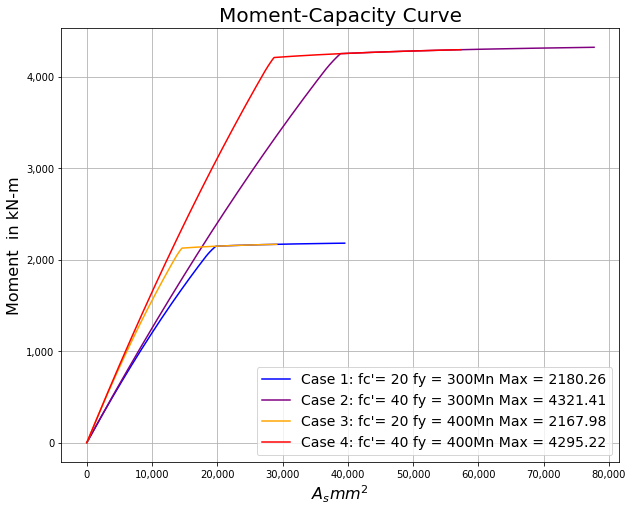

In [3]:
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Moment-Capacity Curve", fontsize=20)
plt.xlabel(r'$A_s mm^2$', fontsize=16)
plt.ylabel('Moment  in kN-m', fontsize=16)
plt.grid()

# Plot the converted values
case1, = plt.plot(As[0], M[0], label='Case 1: fc\'= '+ str(fcPrime[0]) + ' fy = ' +\
                  str(fy[0]) + 'Mn Max = ' + str(round(MnMax[0]/1000**2,2)), color='blue')
case2, = plt.plot(As[1], M[1], label='Case 2: fc\'= '+ str(fcPrime[1]) + ' fy = ' +\
                  str(fy[1]) + 'Mn Max = ' + str(round(MnMax[1]/1000**2,2)), color='purple')
case3, = plt.plot(As[2], M[2], label='Case 3: fc\'= '+ str(fcPrime[2]) + ' fy = ' +\
                  str(fy[2]) + 'Mn Max = ' + str(round(MnMax[2]/1000**2,2)), color='orange')
case4, = plt.plot(As[3], M[3], label='Case 4: fc\'= '+ str(fcPrime[3]) + ' fy = ' +\
                  str(fy[3]) + 'Mn Max = ' + str(round(MnMax[3]/1000**2,2)), color='red')

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_formatter = tkr.FuncFormatter(func)
x_formatter = tkr.FuncFormatter(func)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_formatter)
ax.xaxis.set_major_formatter(x_formatter)

plt.legend(handles=[case1, case2, case3, case4], loc='best', fontsize=14)
plt.show()